### Plotting Error Bars in Python using Matplotlib

A friend of mine needed help with plotting clusters with corresponding asymmetrical error bars. After helping her with the problem, I decided to write a blog post about it.

#### Error Bars

Error bars are graphical representations of the error or uncertainty in data. For scientific purposes, reporting of errors is crucial in understanding the given data.

In [1]:
# Importing numpy
import numpy as np

# For reproducibility of the data
np.random.seed(5)

# Creating the data
X = np.arange(1, 12)
Y = np.cos(X) + 2 * np.random.randn(11) + 4

# Basic error
Y_err = 0.6

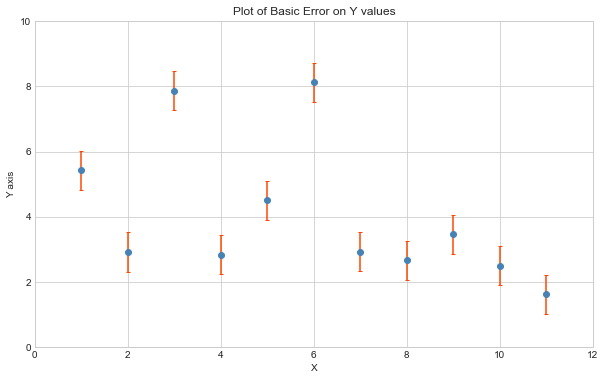

In [2]:
# Importing matplotlib for plotting, and seaborn for styling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, yerr=Y_err, fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Basic Error on Y values')
ax.set_xlabel('X')
ax.set_ylabel('Y axis')
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

For more detailed markers list available in matplotlib please check the [link](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot).

#### Symmetric Error Bars example

Let's look at symmetric Error Bars. In this example, the error data is generated by using numpy's random fucntion. We are creating X errors and Y errors

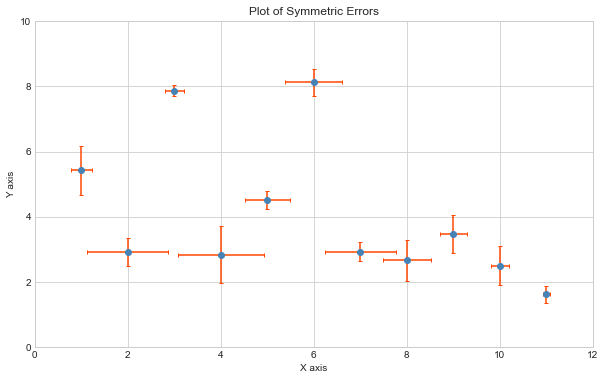

In [3]:
# For reproducibility of the data
np.random.seed(5)

# Creating error data
X_err = np.random.rand(11)
Y_err = np.random.rand(11)

# Defining the figure, and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, xerr=X_err, yerr=Y_err, fmt='o',
             ecolor='orangered', color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Symmetric Errors')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

#### Asymmetric Error Bars example

Let's take this example a step further. Let's imagine that we have a data of 10 clusters, and we need to plot each cluster in different color. Also asymmetric error data for X values needs to be plotted. The data is given in the format of upper and lower errors. 

As in the previous example, we will be randomly generating these lower and upper limits for demonstration purposes.

In [4]:
# For reproducibility of the data
np.random.seed(5)

# Creating lower and upper error data for X values
X_lower = np.random.rand(11)
X_upper = np.random.rand(11) + np.random.rand(11) * 0.5

We can manually define the color list. We can also import the colormap, then export the colors into a new array, and use this array for the purpose of the example. The exported values are in the format RGBA.

In [5]:
# Importing colormap module
import matplotlib.cm as cm

# Creating an empty array
color_array = []

# Appending RGBA values to a new array
for i in range(20):
    color_array.append(cm.get_cmap('tab20')(i))

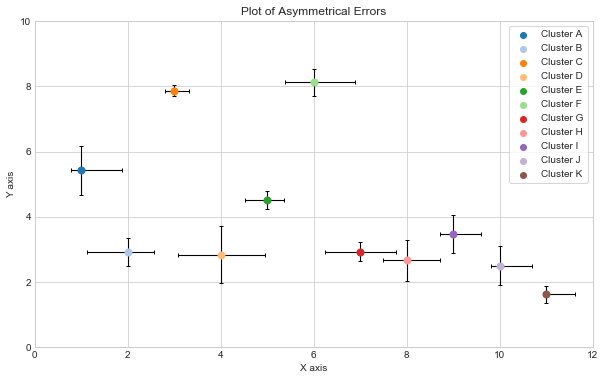

In [6]:
# Creating cluster names
letters = 'ABCDEFGHIJK'

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Looping through the letters and plotting the points
for i, letter in enumerate(letters):
    ax.errorbar(X[i], Y[i], xerr=[[X_lower[i]], [X_upper[i]]],
                yerr=Y_err[i], fmt='o', capsize=2, elinewidth=1.1,
                ms=7, ecolor='k', color=color_array[i])
    # Adding scatter plot to print the legend
    ax.scatter([], [], c=color_array[i], label='Cluster ' + letter)

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)

# Adding plotting parameters
ax.set_title('Plot of Asymmetrical Errors')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);